In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [30]:
def group_bar_plot(group_list, x_tick, legend, title, y_label):
    assert(len(x_tick) == len(group_list))
    x = np.arange(len(x_tick))  # the label locations
    width = 1.0/(len(legend)+2)
    multiplier = 1
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 10))
    ax = plt.gca()

    for i in range(len(legend)):
        data = group_list[:, i]
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=legend[i])
#         ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(x + 0.5)
    ax.set_xticklabels(x_tick)
#     ax.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)
    ax.set_yscale('log')
    plt.show()

In [45]:
legend=["0", "1", "2", "3", "-1", "-2", "-21", "-22", "-23"]
legend_alias=["V/M: d", "V/M: d-s", "V/M: d-s-h", "V/M: d-h", 
              "V: d-s, M: s", "V: d-s, M: d-s-h", 
              "V: d-s, M: h", "V: d-s, M: s-h", "V: d, M: d-s-h"]
x_tick=["2cubes_sphere", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_alias=["2cubes", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]

In [41]:
def get_data(csv_file, group, item, idx=4, keep_unconverged=True):
    result = np.zeros((len(group), len(item)))
    group_idx = 0
    item_idx = 0
    with open(csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row[0] == "matrix":
                continue
            if group[group_idx] not in row[0]:
                continue
#             assert(row[0] == group[group_idx] + '_mixed' + item[item_idx])
            if int(row[2]) == 700 and keep_unconverged:
                result[group_idx, item_idx] = np.nan
            else:
                result[group_idx, item_idx] = np.double(row[idx])
            item_idx = (item_idx + 1) % len(item)
            if item_idx == 0:
                group_idx = (group_idx + 1)
    assert(group_idx == len(group))
    return result

[1.30226 1.96757 5.13635     nan 2.07068 1.43745 1.62521 1.78693]


/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


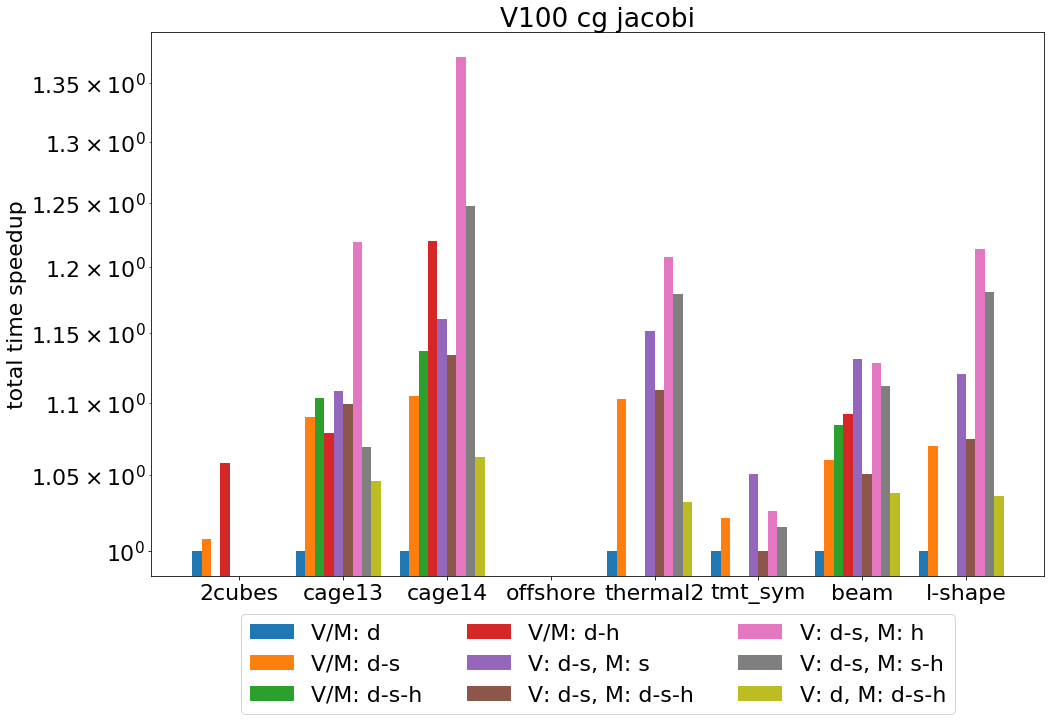

In [52]:
result = get_data('collect_case_10_v_cg_jacobi.csv', x_tick, legend, 5)
print(result[:, 0])
speedup = result[:, [0]]/result
speedup = speedup * (speedup >= 1)
group_bar_plot(speedup, x_tick_alias, legend_alias, 'V100 cg jacobi', 'total time speedup')

[1.39105 2.75688 7.41241     nan 3.68782 2.48445 2.02221 2.55239]


/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


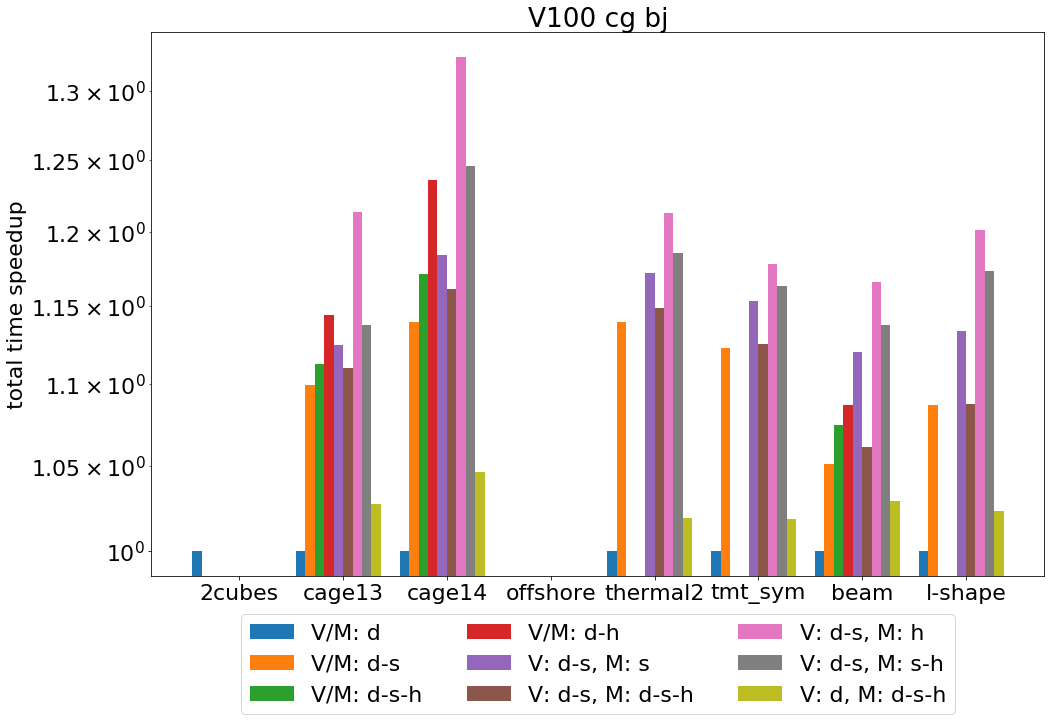

In [53]:
result = get_data('collect_case_10_v_cg_bj.csv', x_tick, legend, 5)
print(result[:, 0])
speedup = result[:, [0]]/result
speedup = speedup * (speedup >= 1)
group_bar_plot(speedup, x_tick_alias, legend_alias, 'V100 cg bj', 'total time speedup')

[2.32038 3.2048      nan 2.56682 4.04701 2.84184 2.92355 3.31557]


/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


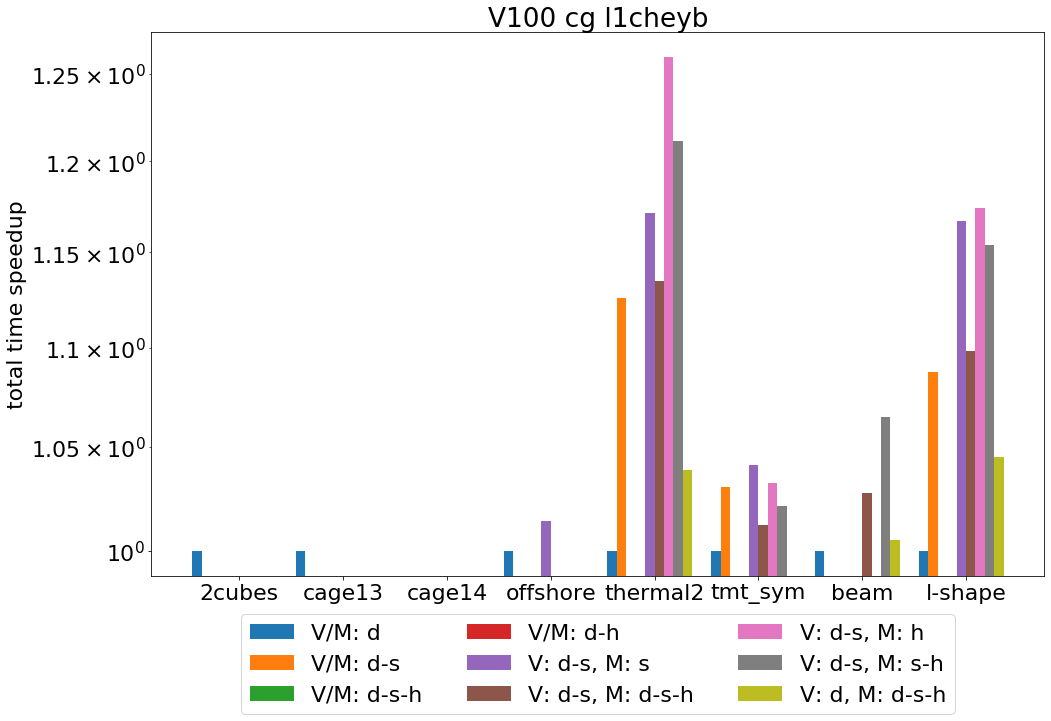

In [54]:
result = get_data('collect_case_10_v_cg_l1cheyb.csv', x_tick, legend, 5)
print(result[:, 0])
speedup = result[:, [0]]/result
speedup = speedup * (speedup >= 1)
group_bar_plot(speedup, x_tick_alias, legend_alias, 'V100 cg l1cheyb', 'total time speedup')

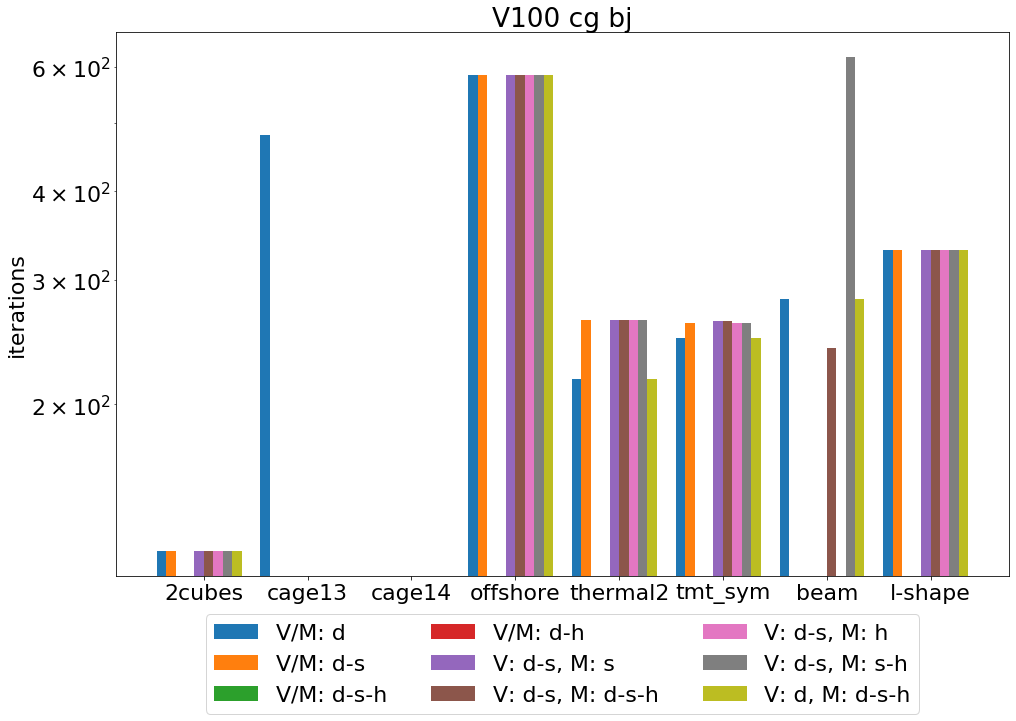

In [51]:
result = get_data('collect_case_10_v_cg_l1cheyb.csv', x_tick, legend, 2)
# speedup = result[:, [0]]/result
# speedup = speedup * (speedup >= 1)
group_bar_plot(result, x_tick_alias, legend_alias, 'V100 cg bj', 'iterations')

In [44]:
legend=["0", "1", "2", "3", "-11", "-12", "-13", "-21", "-22", "-23"]
legend_alias=["V/M: d", "V/M: d-s", "V/M: d-s-h", "V/M: d-h", 
              "V: d-s, M: s", "V: d-s, M: h", "V: d-s, M: d-s-h",
              "V: d, M: s", "V: d, M: h", "V: d, M: d-s-h"]
x_tick=["2cubes_sphere", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_alias=["2cubes", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_jb=["2cubes_sphere", "cage13", "cage14", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_jb_alias=["2cubes", "cage13", "cage14", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_cheyb=["2cubes_sphere", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_cheyb_alias=["2cubes", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]

In [55]:
result = get_data('multigrid/collect_case_10_v_cg_jacobi.csv', x_tick_jb, legend, 4)
speedup = result[:, [0]]/result
speedup = speedup * (speedup >= 1)
group_bar_plot(speedup, x_tick_jb_alias, legend_alias, 'V100 cg jacobi', 'total time speedup')

ValueError: invalid literal for int() with base 10: ' 22.'